AI-Driven Threat Detection

Step 1: Load and Explore the Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load the data
data = pd.read_csv('Train_data.csv')

# Display the first few rows of the dataset
print(data.head())
print(data.info())
print(data.describe())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


Step 2: Data Preprocessing
Convert categorical columns to numerical.
Handle any missing values if present.
Normalize the features.

In [ ]:
# Convert categorical columns to numerical
categorical_cols = ['protocol_type', 'service', 'flag', 'class']
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes

# Separate features and labels
X = data.drop(['class'], axis=1)
y = data['class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=2)


Step 3: Train and Evaluate Models

3.1 Random Forest

Random Forest Training time: 1.7076048851013184
Random Forest Prediction time: 0.08814382553100586
Random Forest Confusion Matrix:
 [[2916   13]
 [   9 3360]]
Random Forest Precision: 0.9965344705694543
Random Forest Recall: 0.9964451046388146
Random Forest F1-score: 0.9964893796106726
Random Forest Accuracy: 0.9965068275643061
Train Score: 1.0
Test Score: 0.9965068275643061


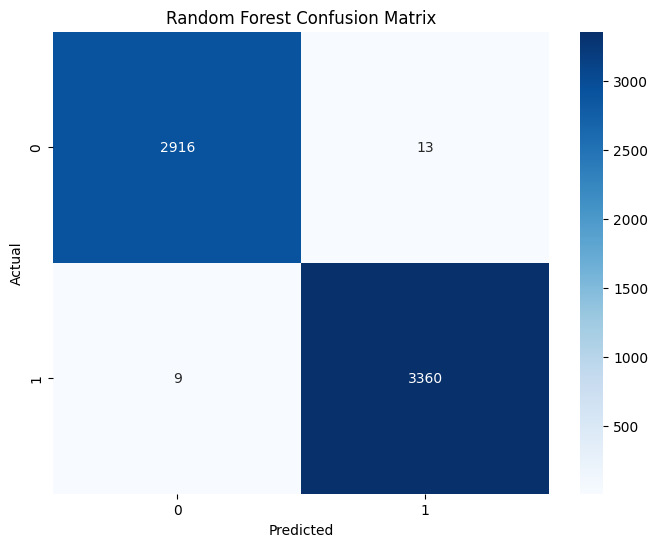

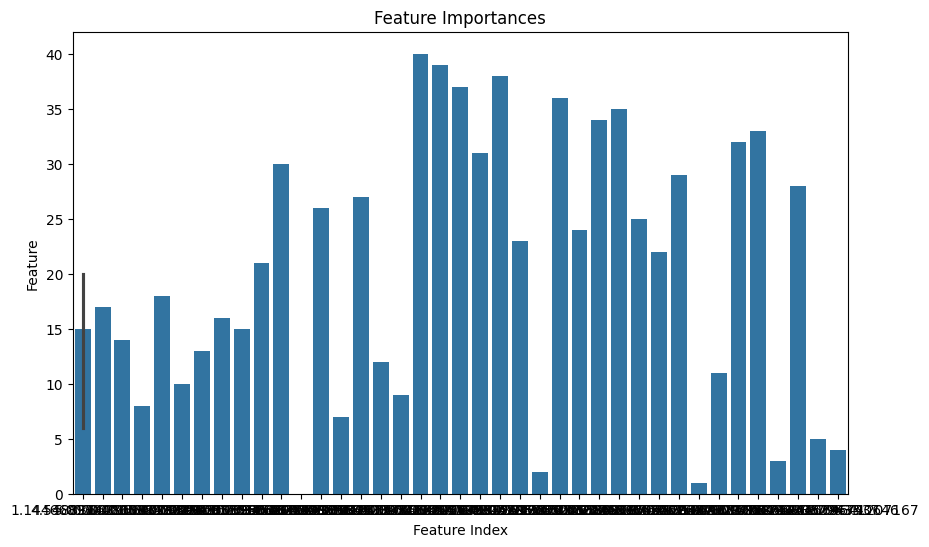

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
start = time.time()
rf_model.fit(X_train, y_train)
end = time.time()
print("Random Forest Training time:", end - start)

# Make predictions
start = time.time()
y_pred_rf = rf_model.predict(X_test)
end = time.time()
print("Random Forest Prediction time:", end - start)

# Evaluate the model
rf_precision = precision_score(y_test, y_pred_rf, average='macro')
rf_recall = recall_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate model accuracy
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)
print(f"Train Score: {rf_train_score}")
print(f"Test Score: {rf_test_score}")

# Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
# Use indices if feature names are not available
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': range(len(feature_importances)), 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Feature Index')
plt.show()


3.2 Decision Tree

Decision Tree Training time: 0.13943195343017578
Decision Tree Prediction time: 0.003368854522705078
Decision Tree Confusion Matrix:
 [[2908   21]
 [  23 3346]]
Decision Tree Precision: 0.9929579213100196
Decision Tree Recall: 0.9930016829484096
Decision Tree F1-score: 0.9929797005342391
Decision Tree Accuracy: 0.9930136551286123


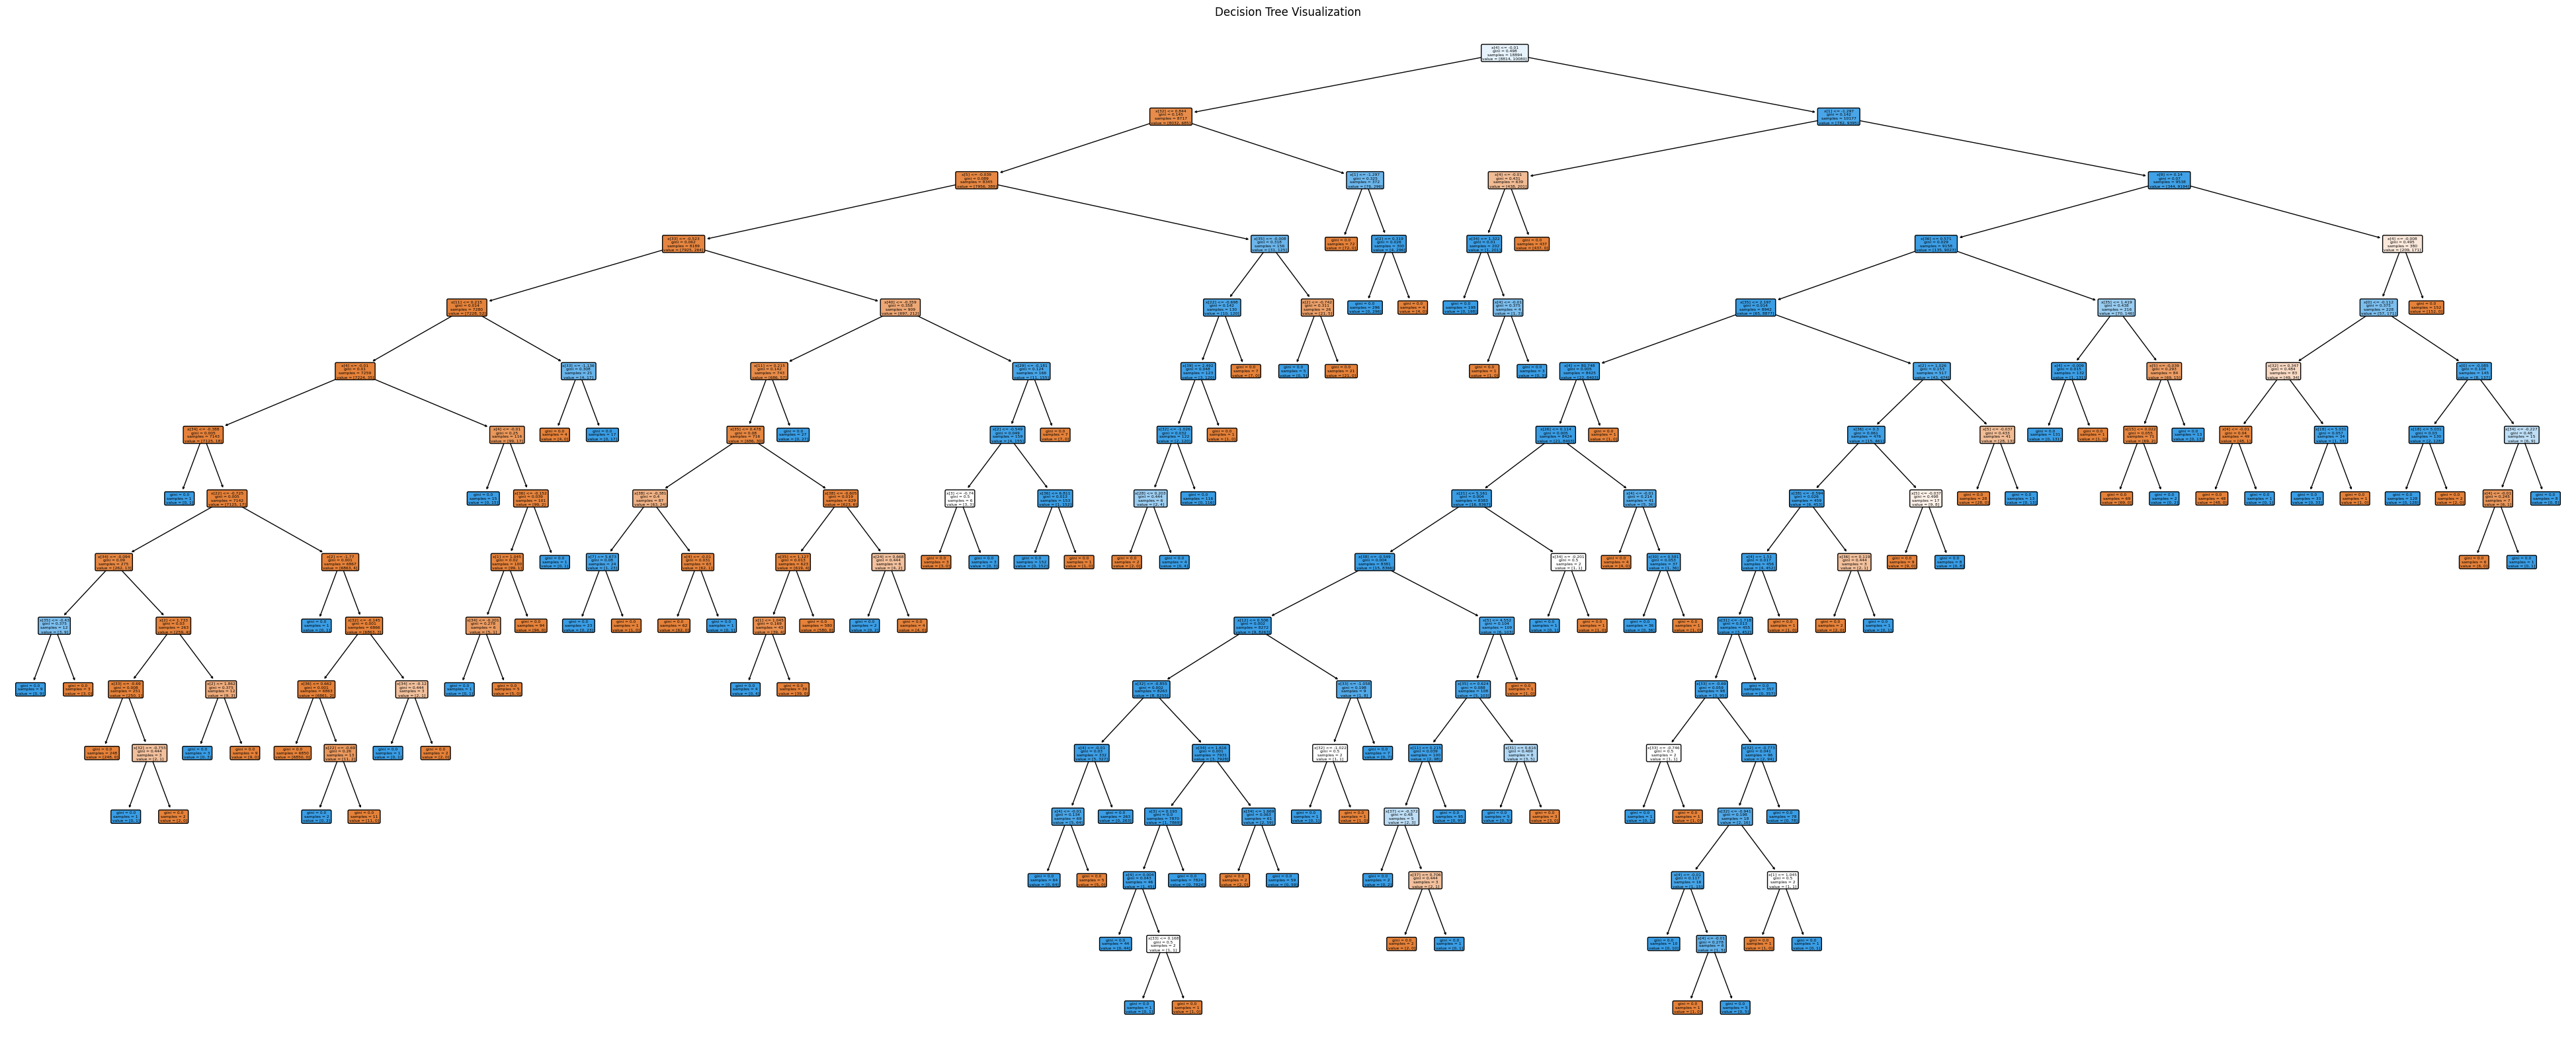

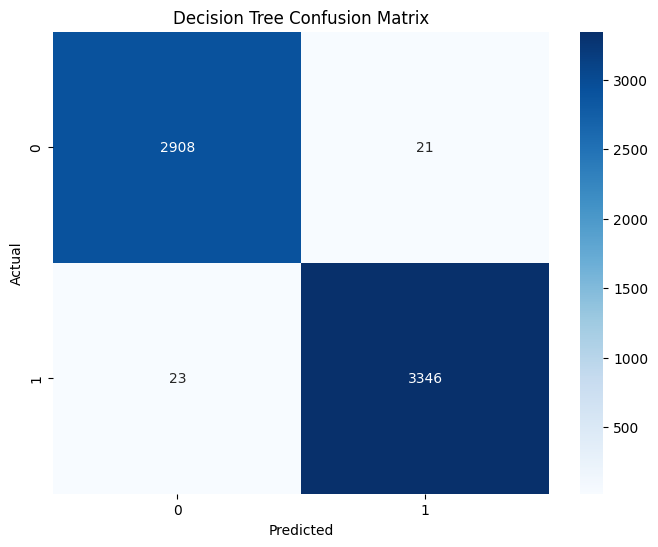

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree # Import plot_tree

dt_model = DecisionTreeClassifier()


start = time.time()
dt_model.fit(X_train, y_train)
end = time.time()
print("Decision Tree Training time:", end - start)

start = time.time()
y_pred_dt = dt_model.predict(X_test)
end = time.time()
print("Decision Tree Prediction time:", end - start)

# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_precision = precision_score(y_test, y_pred_dt, average='macro')
dt_recall = recall_score(y_test, y_pred_dt, average='macro')
dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Evaluate Decision Tree
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree F1-score:", f1_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


# Visualize the Decision Tree
plt.figure(figsize=(50, 20))
plot_tree(dt_model, filled=True, rounded=True) # Use plot_tree directly
plt.title('Decision Tree Visualization')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3.3 K-Nearest Neighbors

KNN Training time: 0.0036284923553466797
KNN Prediction time: 0.8549766540527344
KNN Confusion Matrix:
 [[2900   29]
 [  33 3336]]
KNN Precision: 0.9900652968297932
KNN Recall: 0.9901519092247604
KNN F1-score: 0.9901081978871129
KNN Accuracy: 0.9901556049539536
Train Score: 0.9939134116650788
Test Score: 0.9901556049539536


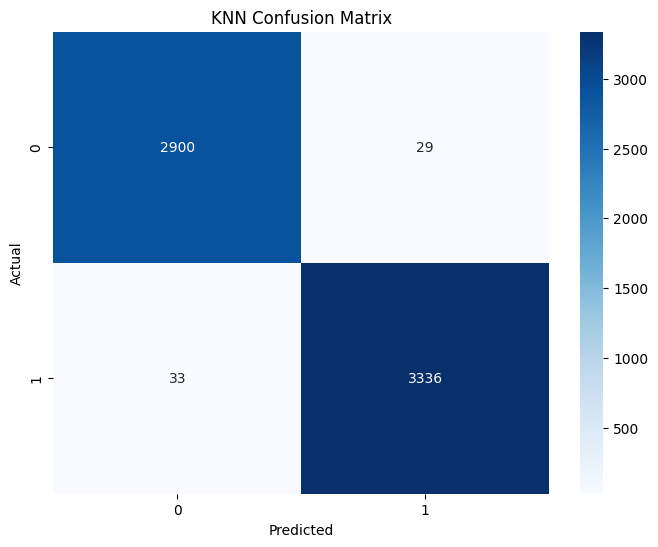

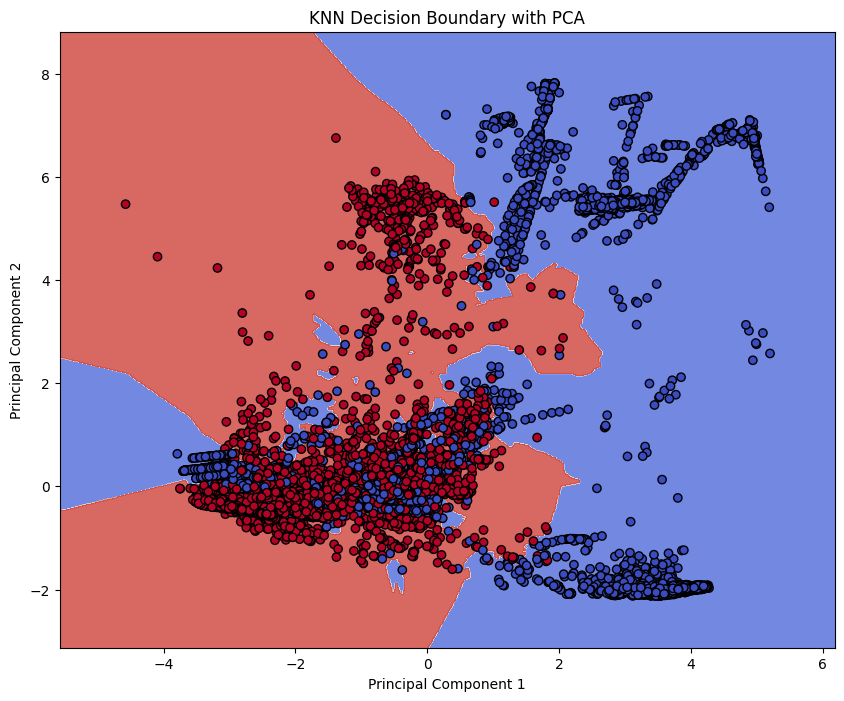

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

knn_model = KNeighborsClassifier()

start = time.time()
knn_model.fit(X_train, y_train)
end = time.time()
print("KNN Training time:", end - start)

start = time.time()
y_pred_knn = knn_model.predict(X_test)
end = time.time()
print("KNN Prediction time:", end - start)

# Train and evaluate K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_precision = precision_score(y_test, y_pred_knn, average='macro')
knn_recall = recall_score(y_test, y_pred_knn, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Evaluate KNN
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Precision:", precision_score(y_test, y_pred_knn, average='macro'))
print("KNN Recall:", recall_score(y_test, y_pred_knn, average='macro'))
print("KNN F1-score:", f1_score(y_test, y_pred_knn, average='macro'))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Calculate model accuracy
knn_train_score = knn_model.score(X_train, y_train)
knn_test_score = knn_model.score(X_test, y_test)
print(f"Train Score: {knn_train_score}")
print(f"Test Score: {knn_test_score}")

# Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# PCA for Decision Boundary Visualization (for 2D plot)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_model_pca = KNeighborsClassifier()
knn_model_pca.fit(X_train_pca, y_train)

h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('KNN Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Step 4: Visualization

4.1 Correlation Heatmap

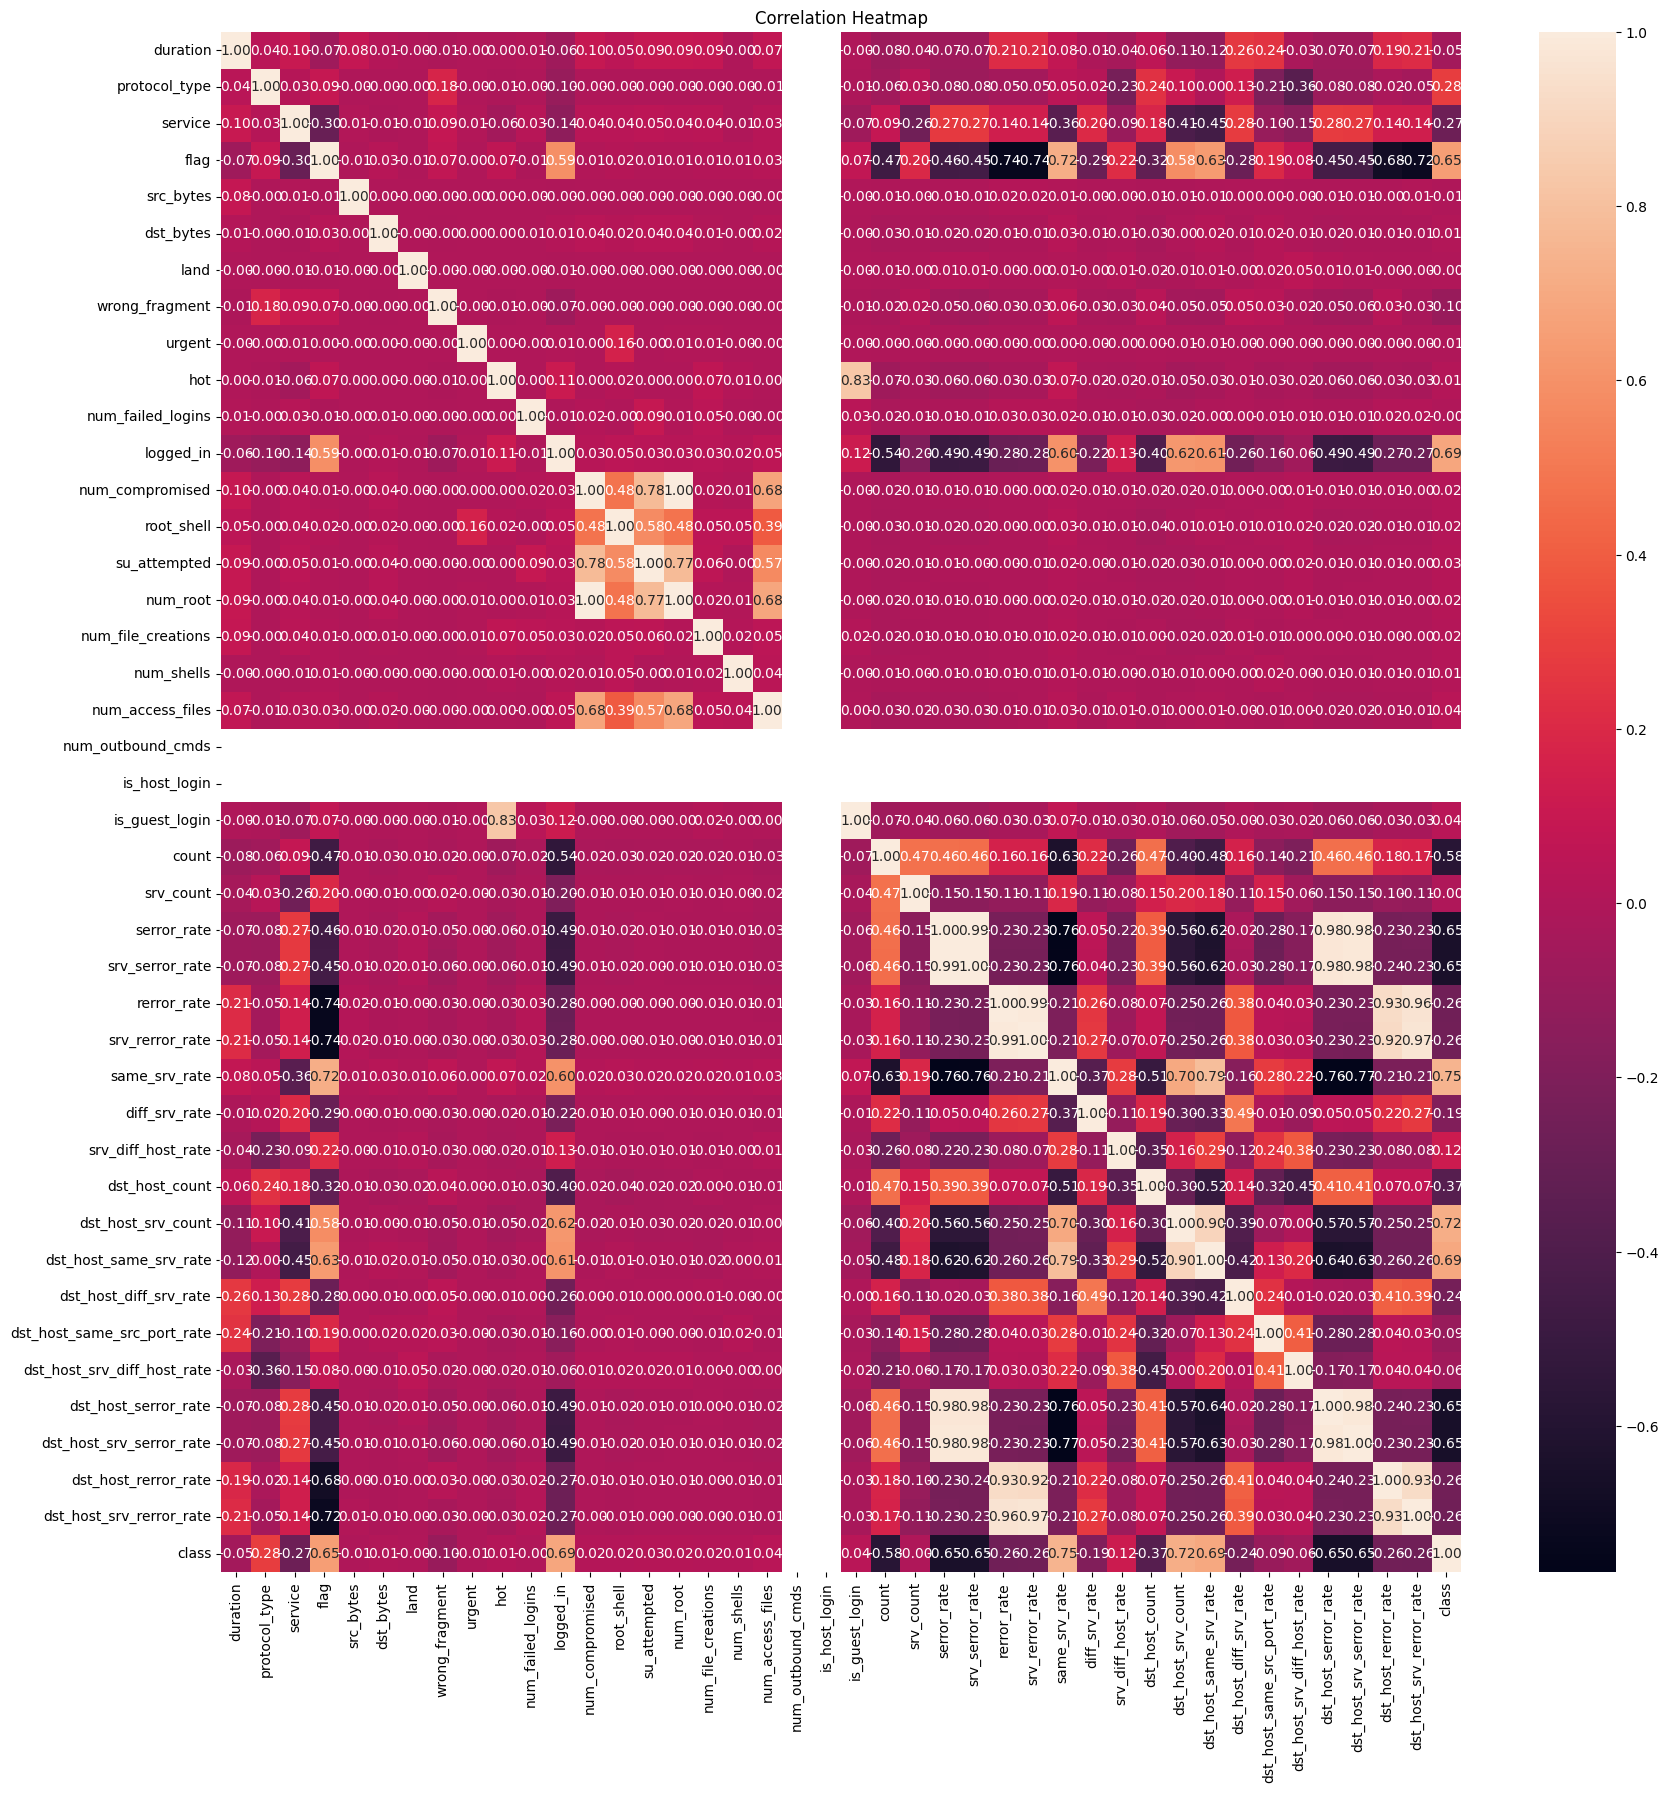

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


4.2 Class Distribution

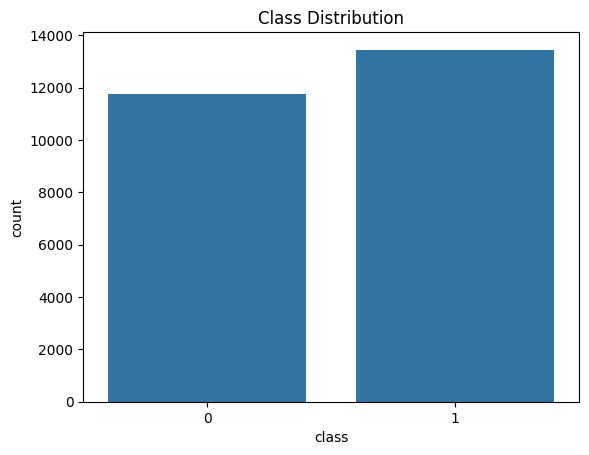

In [ ]:
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()


Comparision

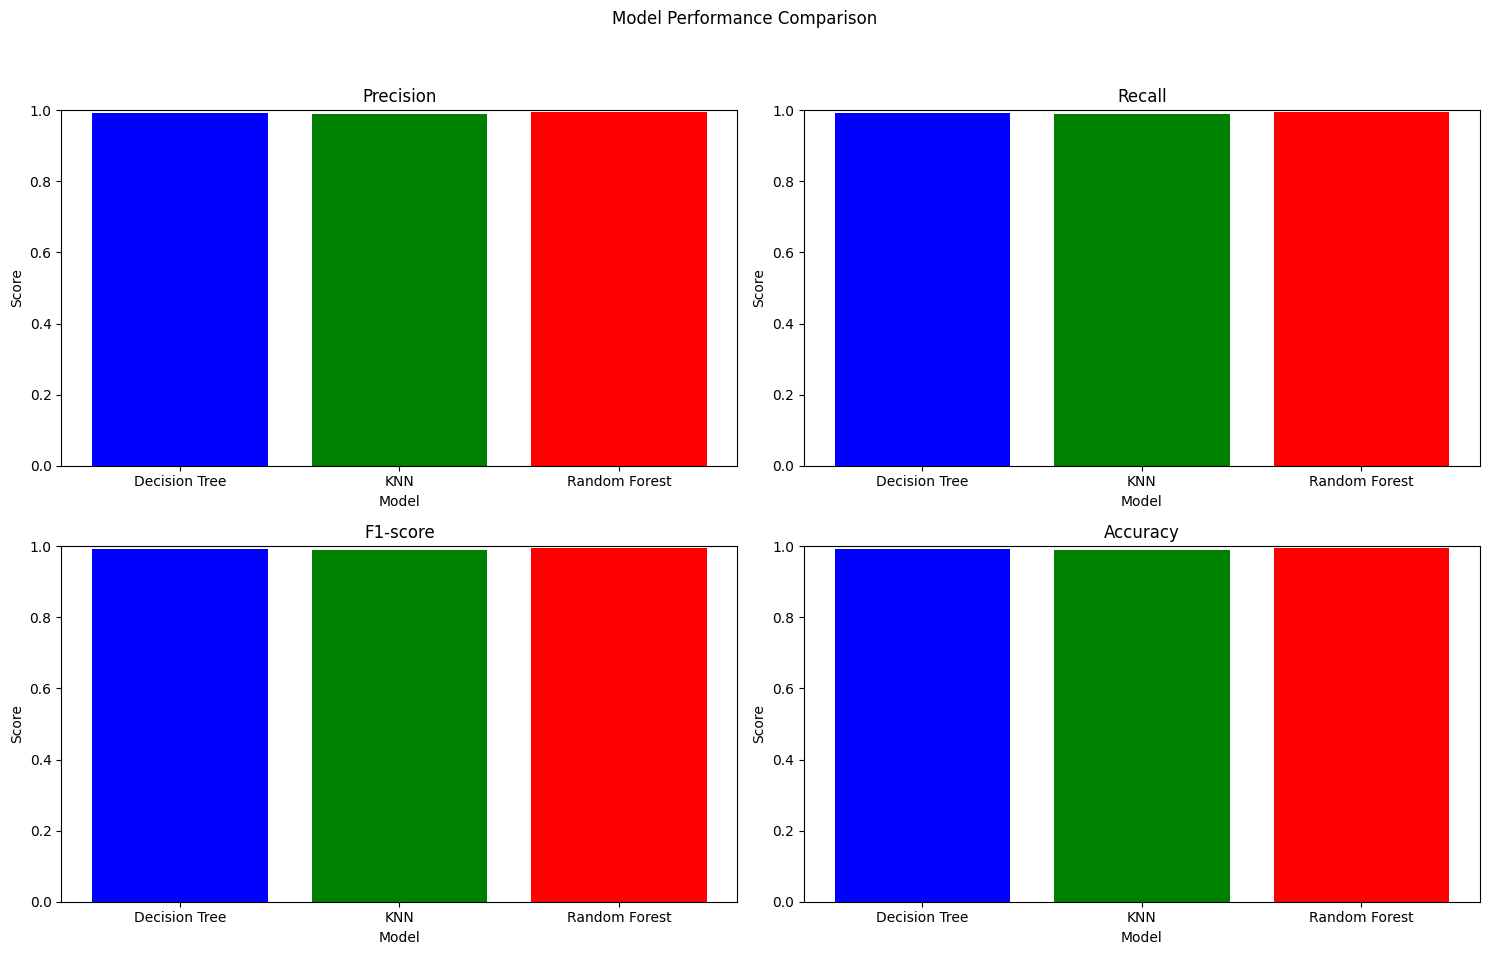

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume that the models have been trained and evaluated, and the following variables are available:
# Decision Tree metrics: dt_precision, dt_recall, dt_f1, dt_accuracy
# KNN metrics: knn_precision, knn_recall, knn_f1, knn_accuracy
# Random Forest metrics: rf_precision, rf_recall, rf_f1, rf_accuracy

# Collecting the metrics in a dictionary
performance_metrics = {
    'Model': ['Decision Tree', 'KNN', 'Random Forest'],
    'Precision': [dt_precision, knn_precision, rf_precision],
    'Recall': [dt_recall, knn_recall, rf_recall],
    'F1-score': [dt_f1, knn_f1, rf_f1],
    'Accuracy': [dt_accuracy, knn_accuracy, rf_accuracy]
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_metrics)

# Plotting the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison')

# Precision
axes[0, 0].bar(performance_df['Model'], performance_df['Precision'], color=['blue','green', 'red'])
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylim(0, 1)

# Recall
axes[0, 1].bar(performance_df['Model'], performance_df['Recall'], color=['blue','green', 'red'])
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylim(0, 1)

# F1-score
axes[1, 0].bar(performance_df['Model'], performance_df['F1-score'], color=['blue','green', 'red'])
axes[1, 0].set_title('F1-score')
axes[1, 0].set_ylim(0, 1)

# Accuracy
axes[1, 1].bar(performance_df['Model'], performance_df['Accuracy'], color=['blue','green', 'red'])
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_ylim(0, 1)

for ax in axes.flat:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Decision Tree Cross-Validation Accuracy: 0.9950 ± 0.0009
KNN Cross-Validation Accuracy: 0.9886 ± 0.0008
Random Forest Cross-Validation Accuracy: 0.9972 ± 0.0004


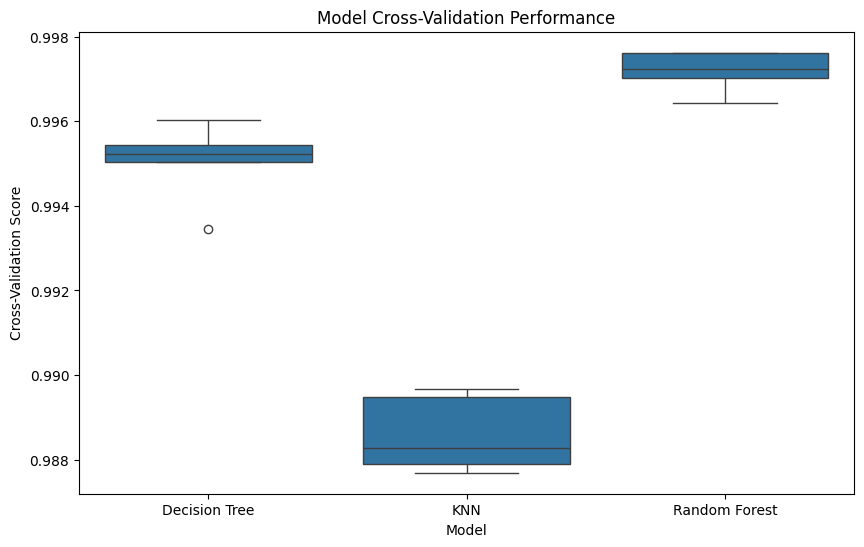

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Perform cross-validation
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # You can change 'accuracy' to other metrics like 'f1_macro'
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Compare models
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.melt(var_name='Model', value_name='Cross-Validation Score')

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Cross-Validation Score', data=cv_df)
plt.title('Model Cross-Validation Performance')
plt.show()
